In [1]:
import re
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
experiment_One = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Proxemics/Minimal_Distances_Experiment_One_Faces.csv")
experiment_One["Experiment"] = 1
experiment_Two = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Proxemics/Minimal_Distances_Experiment_Two_Faces.csv")
experiment_Two["Experiment"] = 2

In [3]:
experiment_Two.num_interactions.value_counts()

num_interactions
1    1598
Name: count, dtype: int64

In [4]:
Building_Coordinates_Exp1 = pd.read_csv("/Volumes/TwoTeras/Resources/BuildingCoordinates_short.csv")
BuildingID_Exp1 = Building_Coordinates_Exp1[["Name", "PointingTargetBuildingId"]]
Building_Coordinates_Exp2 = pd.read_csv("/Volumes/TwoTeras/Resources/BuildingCoordinates_short_exp2.csv")
# Create 'ped_id' based on the specified rule
Building_Coordinates_Exp2['ped_id'] = Building_Coordinates_Exp2['AgentID'].apply(lambda x: f"{x}_cma" if x <= 28 else f"{x}_sa")
BuildingID_Exp2 = Building_Coordinates_Exp2[["ped_id", "PointingTargetBuildingId"]]
# Rename the 'Name' column to 'ped_id' in both datasets
BuildingID_Exp1 = BuildingID_Exp1.rename(columns={"Name": "ped_id"})

In [5]:
Building_Coordinates_Exp1.tail(50)

,Unnamed: 0,BuildingCenterWorld.x,BuildingCenterWorld.z,Name,BuildingName,PointingTargetBuildingId,AgentID,PointingTargetCondition,Context,Agent
62,62,-3.336735,-255.873932,23_CmANo,TaskBuilding_32,32,23,CmANo,True,False
63,63,-3.336735,-255.873932,23_CmA,TaskBuilding_32,32,23,CmA,True,True
64,64,-7.465199,-63.017349,45_Sa,TaskBuilding_33,33,45,Sa,False,True
65,65,-7.465199,-63.017349,45_SaNo,TaskBuilding_33,33,45,SaNo,False,False
66,66,-36.339226,136.030396,19_CmA,TaskBuilding_34,34,19,CmA,True,True
67,67,-36.339226,136.030396,19_CmANo,TaskBuilding_34,34,19,CmANo,True,False
68,68,-72.578285,53.288437,46_Sa,TaskBuilding_35,35,46,Sa,False,True
69,69,-72.578285,53.288437,46_SaNo,TaskBuilding_35,35,46,SaNo,False,False
70,70,-51.411949,-142.603455,47_Sa,TaskBuilding_36,36,47,Sa,False,True
71,71,-51.411949,-142.603455,47_SaNo,TaskBuilding_36,36,47,SaNo,False,False


In [6]:
Building_Coordinates_Exp2.columns

Index(['Unnamed: 0', 'BuildingCenterWorld.x', 'BuildingCenterWorld.z', 'Name',
       'BuildingName', 'PointingTargetBuildingId', 'AgentID',
       'PointingTargetCondition', 'Context', 'Agent', 'ped_id'],
      dtype='object')

In [7]:
# Step 1: Create Experiment_One with the same logic using Building_Coordinates_Exp1
Experiment_One = pd.DataFrame(
    Building_Coordinates_Exp1.groupby([
        'BuildingName', 
        'PointingTargetBuildingId', 
        'AgentID', 
        'PointingTargetCondition', 
        'Context'
    ])['Name'].count()
)

# Step 2: Reset the index for proper DataFrame structure
Experiment_One.reset_index(inplace=True)

# Step 3: Filter out rows where 'PointingTargetCondition' contains 'No'
Experiment_One = Experiment_One[~Experiment_One['PointingTargetCondition'].str.contains("No", case=False, na=False)]


display(Experiment_One.head(50))



Experiment_Two = pd.DataFrame(Building_Coordinates_Exp2.groupby(['BuildingName', 'PointingTargetBuildingId', 'AgentID',
       'PointingTargetCondition', 'Context', 'ped_id'])['Name'].count())
Experiment_Two.reset_index(inplace=True)
# Filter out rows where 'PointingTargetCondition' contains 'No'
Experiment_Two = Experiment_Two[~Experiment_Two['PointingTargetCondition'].str.contains("No", case=False, na=False)]

Experiment_Two.head(50)

,BuildingName,PointingTargetBuildingId,AgentID,PointingTargetCondition,Context,Name
0,BasketballCourt_58,58,20,CmA,True,1
2,Church-TaskBuilding_16,16,28,CmA,True,1
4,Construction_57,57,5,CmA,True,1
6,Crane_59,59,27,CmA,True,1
8,HighSilo-TaskBuilding_49,49,56,Sa,False,1
10,TaskBuilding_1,1,30,Sa,False,1
12,TaskBuilding_11,11,14,CmA,True,1
14,TaskBuilding_12,12,35,Sa,False,1
16,TaskBuilding_13,13,24,CmA,True,1
18,TaskBuilding_14,14,1,CmA,True,1


,BuildingName,PointingTargetBuildingId,AgentID,PointingTargetCondition,Context,ped_id,Name
0,BasketballCourt_58,58,10,CmAAct,True,10_cma,1
2,Church-TaskBuilding_16,16,3,CmAAct,True,3_cma,1
4,Construction_57,57,36,CmA,True,36_sa,1
6,Crane_59,59,7,CmAAct,True,7_cma,1
8,HighSilo-TaskBuilding_49,49,21,SaAct,False,21_cma,1
10,TaskBuilding_1,1,53,Sa,False,53_sa,1
12,TaskBuilding_11,11,24,CmAAct,True,24_cma,1
14,TaskBuilding_12,12,48,Sa,False,48_sa,1
16,TaskBuilding_13,13,2,CmAAct,True,2_cma,1
18,TaskBuilding_14,14,40,CmA,True,40_sa,1


In [8]:
# Define a function to classify Agent_type based on AgentID
def classify_agent_type(agent_id):
    return "Congruent" if agent_id < 28 else "Passive"

# Apply the function to create a new column 'Agent_type'
Experiment_One['Agent_type'] = Experiment_One['AgentID'].apply(classify_agent_type)

# Display the updated DataFrame
print(Experiment_One.head())

# Export selected columns to a CSV file
Experiment_One[["BuildingName", "AgentID", "Agent_type"]].to_csv(
    "/Volumes/TwoTeras/Resources/Congruent_Experiment_One.csv", 
    index=False)

# Define a function to classify conditions
def classify_condition(condition):
    if condition in ["SaAct", "CmAAct"]:
        return "Incongruent"
    elif condition in ["CmA", "Sa"]:
        return "Passive"
    else:
        return "Unknown"

# Apply the function to create a new column
Experiment_Two['Agent_type'] = Experiment_Two['PointingTargetCondition'].apply(classify_condition)
Experiment_Two.head()
Experiment_Two[["BuildingName","ped_id", "Agent_type"]].to_csv("/Volumes/TwoTeras/Resources/Incongruent_Experiment_Two.csv", 
    index=False)

               BuildingName  PointingTargetBuildingId  AgentID  \
0        BasketballCourt_58                        58       20   
2    Church-TaskBuilding_16                        16       28   
4           Construction_57                        57        5   
6                  Crane_59                        59       27   
8  HighSilo-TaskBuilding_49                        49       56   

  PointingTargetCondition  Context  Name Agent_type  
0                     CmA     True     1  Congruent  
2                     CmA     True     1    Passive  
4                     CmA     True     1  Congruent  
6                     CmA     True     1  Congruent  
8                      Sa    False     1    Passive  


In [9]:
# Filter the DataFrame for AgentID < 28 and Agent_type == "Passive"
filtered_passive_agents = Experiment_Two[(Experiment_Two['AgentID'] < 28) & 
                                         (Experiment_Two['Agent_type'] == "Passive")]

# Display the filtered rows
print(filtered_passive_agents)

# Check if any cases were found
if filtered_passive_agents.empty:
    print("No cases found where AgentID < 28 and Agent_type is 'Passive'.")
else:
    print("Matching cases found:")
    print(filtered_passive_agents)


Empty DataFrame
Columns: [BuildingName, PointingTargetBuildingId, AgentID, PointingTargetCondition, Context, ped_id, Name, Agent_type]
Index: []
No cases found where AgentID < 28 and Agent_type is 'Passive'.


In [10]:
Label_Buildings = Building_Coordinates_Exp1[["AgentID","BuildingName", "PointingTargetBuildingId", "Context"]]
Labels = pd.read_csv("/Volumes/TwoTeras/Resources/BuildingLabels.csv")
# Rename the 'Name' column to 'ped_id' in both datasets
Labels = Labels.rename(columns={"avatarID": "AgentID", "BuildingName": "Label"})
Labels.head()
Labels_Complete = pd.merge(Label_Buildings, Labels, on='AgentID', how='left')

In [11]:
# Replace (RH) with (R) and (MB) with (P) in the 'Label' column
Labels_Complete['Label'] = Labels_Complete['Label'].replace({'(RH)': 'R', '(MB)': 'P'}, regex=True)


In [12]:
Labels_Complete.tail()

,AgentID,BuildingName,PointingTargetBuildingId,Context,Label
107,5,Construction_57,57,True,(P) Construction site
108,20,BasketballCourt_58,58,True,(P) Basketball Court
109,20,BasketballCourt_58,58,True,(P) Basketball Court
110,27,Crane_59,59,True,(GL) Castle construction
111,27,Crane_59,59,True,(GL) Castle construction


In [13]:
# Use `.str.extract` to keep only the part up to and including '_cma' or '_sa' (case insensitive)
BuildingID_Exp2['ped_id'] = BuildingID_Exp2['ped_id'].str.extract(r'(^.*?_(?:cma|sa))', expand=False, flags=re.IGNORECASE)

# Display the cleaned `BuildingID_Exp2`
print(BuildingID_Exp2)


     ped_id  PointingTargetBuildingId
0     53_sa                         1
1     53_sa                         1
2     31_sa                         2
3     31_sa                         2
4     30_sa                         3
..      ...                       ...
107   36_sa                        57
108  10_cma                        58
109  10_cma                        58
110   7_cma                        59
111   7_cma                        59

[112 rows x 2 columns]


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4578/315799198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BuildingID_Exp2['ped_id'] = BuildingID_Exp2['ped_id'].str.extract(r'(^.*?_(?:cma|sa))', expand=False, flags=re.IGNORECASE)


In [14]:
BuildingID_Exp2

,ped_id,PointingTargetBuildingId
0,53_sa,1
1,53_sa,1
2,31_sa,2
3,31_sa,2
4,30_sa,3
...,...,...
107,36_sa,57
108,10_cma,58
109,10_cma,58
110,7_cma,59


In [15]:
# Normalize 'ped_id' to lowercase and ensure consistent zero padding
experiment_One['ped_id'] = experiment_One['ped_id'].str.lower().str.zfill(6)
BuildingID_Exp1['ped_id'] = BuildingID_Exp1['ped_id'].str.lower().str.zfill(6)

# Perform the merge
merged_experiment_One = pd.merge(experiment_One, BuildingID_Exp1, on='ped_id', how='left')


In [16]:
# Normalize 'ped_id' to lowercase and ensure consistent zero padding for experiment_Two and BuildingID_Exp2
experiment_Two['ped_id'] = experiment_Two['ped_id'].str.lower().str.zfill(6)
BuildingID_Exp2['ped_id'] = BuildingID_Exp2['ped_id'].str.lower().str.zfill(6)

# Perform the merge
merged_experiment_Two = pd.merge(experiment_Two, BuildingID_Exp2, on='ped_id', how='left')


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4578/2629404893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BuildingID_Exp2['ped_id'] = BuildingID_Exp2['ped_id'].str.lower().str.zfill(6)


In [17]:
merged_experiment_Two.head()

,Unnamed: 0.1,Unnamed: 0,ped_id,minimal_distance,num_interactions,SubjectID,Session,Agent_Type,Experiment,PointingTargetBuildingId
0,0,0,14_cma,2.423238,1,4580,2,Active,2,38
1,0,0,14_cma,2.423238,1,4580,2,Active,2,38
2,1,1,28_cma,4.818717,1,4580,2,Active,2,10
3,1,1,28_cma,4.818717,1,4580,2,Active,2,10
4,2,2,038_sa,3.255416,1,4580,2,Passive,2,9


In [18]:
# Displaying rows with null values in the 'PointingTargetBuildingId' column for the DataFrame 'merged_experiment_Two'
null_values_ptb_experiment_two = merged_experiment_Two[merged_experiment_Two['PointingTargetBuildingId'].isnull()]
null_values_ptb_experiment_two


,Unnamed: 0.1,Unnamed: 0,ped_id,minimal_distance,num_interactions,SubjectID,Session,Agent_Type,Experiment,PointingTargetBuildingId


In [19]:
stacked_df = pd.concat([merged_experiment_One, merged_experiment_Two], axis=0)

In [20]:
Complete = pd.merge(stacked_df, Labels_Complete, on='PointingTargetBuildingId', how='left')

In [21]:
# Step 2: Calculate IQR for each 'Label' in Experiment 1
iqr_values = Complete.groupby('Label')['minimal_distance'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25)).reset_index()
iqr_values = iqr_values.rename(columns={'minimal_distance': 'IQR'})
# Sort DataFrame by 'IQR' in ascending order
iqr_sorted = iqr_values.sort_values(by="IQR", ascending=True).reset_index(drop=True)
iqr_std_dev = iqr_sorted["IQR"].std()
iqr_sorted["IQR Std Dev"] = iqr_std_dev
iqr_sorted.head(7)

,Label,IQR,IQR Std Dev
0,(R) Shark,0.137556,1.611186
1,(P) Tapas bar,0.265192,1.611186
2,(P) Construction site,0.742878,1.611186
3,(R) Owl,0.762470,1.611186
4,(R) Gorilla,1.193970,1.611186
5,(R) Tree,1.213394,1.611186
6,(GL) Church,1.307107,1.611186


In [22]:
# Calculate mean and standard deviation of the IQR values, excluding NaN
iqr_mean = iqr_sorted["IQR"].mean()
iqr_std_dev = iqr_sorted["IQR"].std()

# Calculate the lower threshold 
lower_threshold = iqr_std_dev * 1/3

# Identify values in the IQR column that are below the lower threshold
iqr_sorted["Is Extreme (Low)"] = iqr_sorted["IQR"] < lower_threshold

Labels_Extreme = list(iqr_sorted[iqr_sorted["Is Extreme (Low)"]].Label)

In [23]:
# Filter the DataFrame to exclude rows where 'Label' is in the labels_to_exclude list
filtered_df = Complete[~Complete["Label"].isin(Labels_Extreme)].reset_index(drop=True)
Number_Of_Lost_Cases  = Complete.shape[0] - filtered_df.shape[0]
Number_Of_Lost_Cases

156

In [24]:
experiment_One.Agent_Type.value_counts()

Agent_Type
Active     566
Passive    485
Name: count, dtype: int64

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4578/643990940.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=experiment_One,
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4578/643990940.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=experiment_Two,
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4578/643990940.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


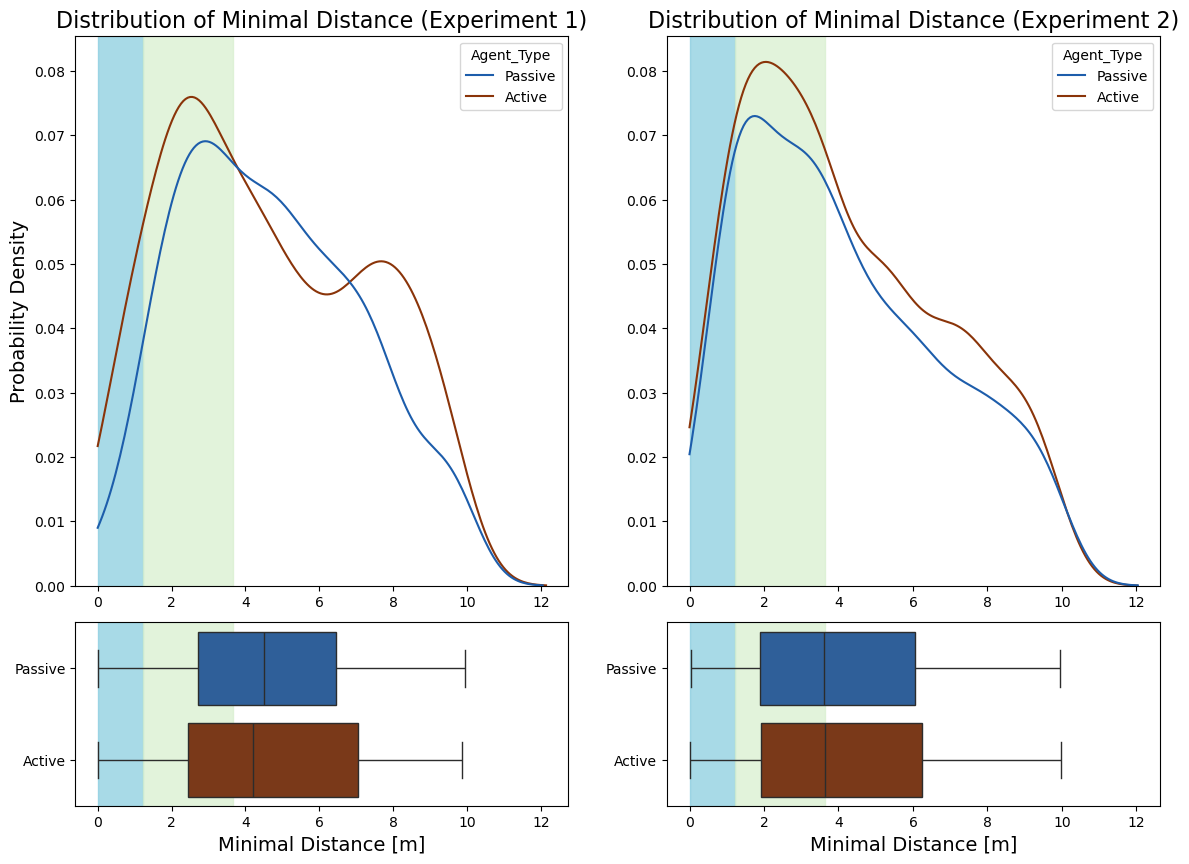

In [25]:
# Set up the figure with GridSpec for more flexible layout
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1], hspace=0.1)

# Define the custom color palette and a mapping to agent types
color_palette = {
    "Passive": "#1d5dabff",  # Blue
    "Active": "#8a3409ff"  # Red
}

# Define background colors
background_color_1 = "#84CBDE"  # Personal
background_color_2 = "#D7EFCD"  # Social

# Create the KDE plot for Experiment 1
ax_kde1 = fig.add_subplot(gs[0, 0])
# Add background shading
ax_kde1.axvspan(0, 1.22, color=background_color_1, alpha=0.7, zorder=0)
ax_kde1.axvspan(1.22, 3.65, color=background_color_2, alpha=0.7, zorder=0)
sns.kdeplot(data=experiment_One, 
            x='minimal_distance', hue='Agent_Type', fill=False, palette=color_palette, ax=ax_kde1, clip=(0, None), hue_order=["Passive", "Active"], zorder=1)
ax_kde1.set_title('Distribution of Minimal Distance (Experiment 1)', size=16)
ax_kde1.set_xlabel('')
ax_kde1.set_ylabel('Probability Density', size=14)

# Create the KDE plot for Experiment 2
ax_kde2 = fig.add_subplot(gs[0, 1], sharey=ax_kde1)
# Add background shading
ax_kde2.axvspan(0, 1.22, color=background_color_1, alpha=0.7, zorder=0)
ax_kde2.axvspan(1.22, 3.65, color=background_color_2, alpha=0.7, zorder=0)
sns.kdeplot(data=experiment_Two, 
            x='minimal_distance', hue='Agent_Type', fill=False, palette=color_palette, ax=ax_kde2, clip=(0, None), hue_order=["Passive", "Active"], zorder=1)
ax_kde2.set_title('Distribution of Minimal Distance (Experiment 2)', size=16)
ax_kde2.set_xlabel('')
ax_kde2.set_ylabel('')

# Create the boxplot for Experiment 1 beneath the KDE
ax_box1 = fig.add_subplot(gs[1, 0], sharex=ax_kde1)
# Add background shading
ax_box1.axvspan(0, 1.22, color=background_color_1, alpha=0.7, zorder=0)
ax_box1.axvspan(1.22, 3.65, color=background_color_2, alpha=0.7, zorder=0)
sns.boxplot(data=experiment_One, 
            x='minimal_distance', y='Agent_Type', palette=[color_palette["Passive"], color_palette["Active"]], 
            order=["Passive", "Active"], orient='h', ax=ax_box1, zorder=1)
ax_box1.set_xlabel('Minimal Distance [m]', size=14)
ax_box1.set_ylabel('')

# Create the boxplot for Experiment 2 beneath the KDE
ax_box2 = fig.add_subplot(gs[1, 1], sharex=ax_kde2)
# Add background shading
ax_box2.axvspan(0, 1.22, color=background_color_1, alpha=0.7, zorder=0)
ax_box2.axvspan(1.22, 3.65, color=background_color_2, alpha=0.7, zorder=0)
sns.boxplot(data=experiment_Two, 
            x='minimal_distance', y='Agent_Type', palette=[color_palette["Passive"], color_palette["Active"]], 
            order=["Passive", "Active"], orient='h', ax=ax_box2, zorder=1)
ax_box2.set_xlabel('Minimal Distance [m]', size=14)
ax_box2.set_ylabel('')

# Adjust the layout
plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Proxemics.png",  bbox_inches="tight",
            pad_inches=0.3)
plt.show()


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4578/4281799316.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4578/4281799316.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4578/4281799316.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4578/4281799316.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

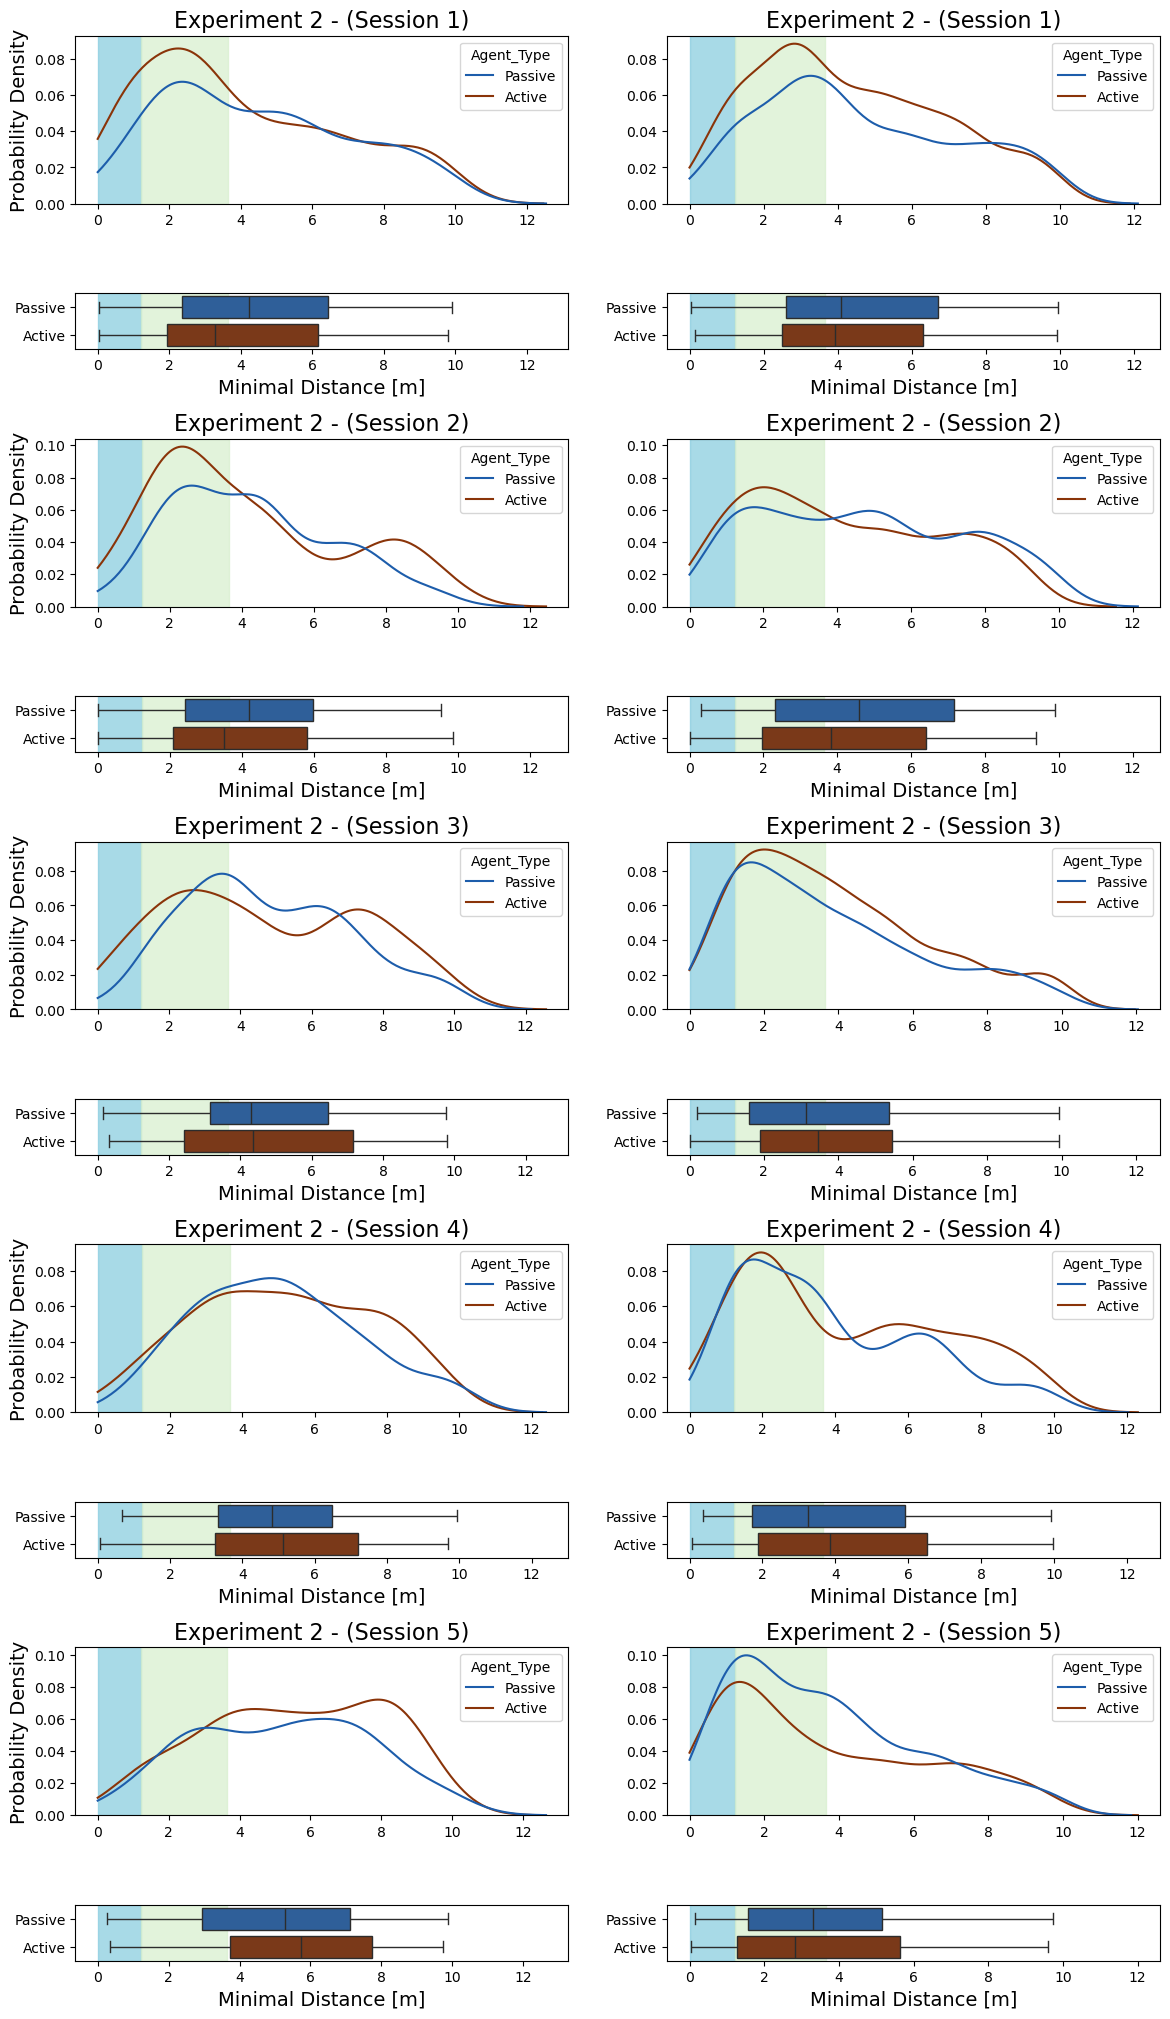

In [26]:
# Define the custom color palette and a mapping to agent types
color_palette = {
    "Passive": "#1d5dabff",  # Blue
    "Active": "#8a3409ff"  # Red
}

# Define background colors
background_color_1 = "#84CBDE"  # Personal
background_color_2 = "#D7EFCD"  # Social

# Get unique sessions in sorted order
sessions = sorted(filtered_df['Session'].unique())
experiments = filtered_df['Experiment'].unique()

# Set up the figure with GridSpec
fig = plt.figure(figsize=(14, 5 * len(sessions)))
gs = gridspec.GridSpec(len(sessions) * 2, 2, height_ratios=[3, 1] * len(sessions))

# Loop through each session and plot side-by-side for both experiments
for idx, session in enumerate(sessions):
    # Filter data for the current session and experiment
    session_data_exp1 = filtered_df[(filtered_df['Session'] == session) & (filtered_df['Experiment'] == experiments[0])]
    session_data_exp2 = filtered_df[(filtered_df['Session'] == session) & (filtered_df['Experiment'] == experiments[1])]

    # KDE plot for Experiment 1
    ax_kde1 = fig.add_subplot(gs[2 * idx, 0])
    ax_kde1.axvspan(0, 1.22, color=background_color_1, alpha=0.7, zorder=0)
    ax_kde1.axvspan(1.22, 3.65, color=background_color_2, alpha=0.7, zorder=0)
    sns.kdeplot(
        data=session_data_exp1, x='minimal_distance', hue='Agent_Type', fill=False,
        palette=color_palette, ax=ax_kde1, clip=(0, None), hue_order=["Passive", "Active"], zorder=1
    )
    ax_kde1.set_title(f'Experiment 2 - (Session {session})', size=16)
    ax_kde1.set_xlabel('')
    ax_kde1.set_ylabel('Probability Density', size=14)

    # KDE plot for Experiment 2
    ax_kde2 = fig.add_subplot(gs[2 * idx, 1], sharey=ax_kde1)
    ax_kde2.axvspan(0, 1.22, color=background_color_1, alpha=0.7, zorder=0)
    ax_kde2.axvspan(1.22, 3.65, color=background_color_2, alpha=0.7, zorder=0)
    sns.kdeplot(
        data=session_data_exp2, x='minimal_distance', hue='Agent_Type', fill=False,
        palette=color_palette, ax=ax_kde2, clip=(0, None), hue_order=["Passive", "Active"], zorder=1
    )
    ax_kde2.set_title(f'Experiment 2 - (Session {session})', size=16)
    ax_kde2.set_xlabel('')
    ax_kde2.set_ylabel('')

    # Boxplot for Experiment 1
    ax_box1 = fig.add_subplot(gs[2 * idx + 1, 0], sharex=ax_kde1)
    ax_box1.axvspan(0, 1.22, color=background_color_1, alpha=0.7, zorder=0)
    ax_box1.axvspan(1.22, 3.65, color=background_color_2, alpha=0.7, zorder=0)
    sns.boxplot(
        data=session_data_exp1, x='minimal_distance', y='Agent_Type',
        palette=[color_palette["Passive"], color_palette["Active"]],
        order=["Passive", "Active"], orient='h', ax=ax_box1, zorder=1
    )
    ax_box1.set_xlabel('Minimal Distance [m]', size=14)
    ax_box1.set_ylabel('')

    # Boxplot for Experiment 2
    ax_box2 = fig.add_subplot(gs[2 * idx + 1, 1], sharex=ax_kde2)
    ax_box2.axvspan(0, 1.22, color=background_color_1, alpha=0.7, zorder=0)
    ax_box2.axvspan(1.22, 3.65, color=background_color_2, alpha=0.7, zorder=0)
    sns.boxplot(
        data=session_data_exp2, x='minimal_distance', y='Agent_Type',
        palette=[color_palette["Passive"], color_palette["Active"]],
        order=["Passive", "Active"], orient='h', ax=ax_box2, zorder=1
    )
    ax_box2.set_xlabel('Minimal Distance [m]', size=14)
    ax_box2.set_ylabel('')

# Adjust layout with increased spacing between sessions
plt.subplots_adjust(hspace=0.8)  # Increase spacing between sessions only
plt.show()


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4578/3822437285.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=experiment_One, x='ped_id', y='minimal_distance', palette="crest", order=order_experiment_one, ax=axes[0])
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_4578/3822437285.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=experiment_Two, x='ped_id', y='minimal_distance', palette="crest", order=order_experiment_two, ax=axes[1])


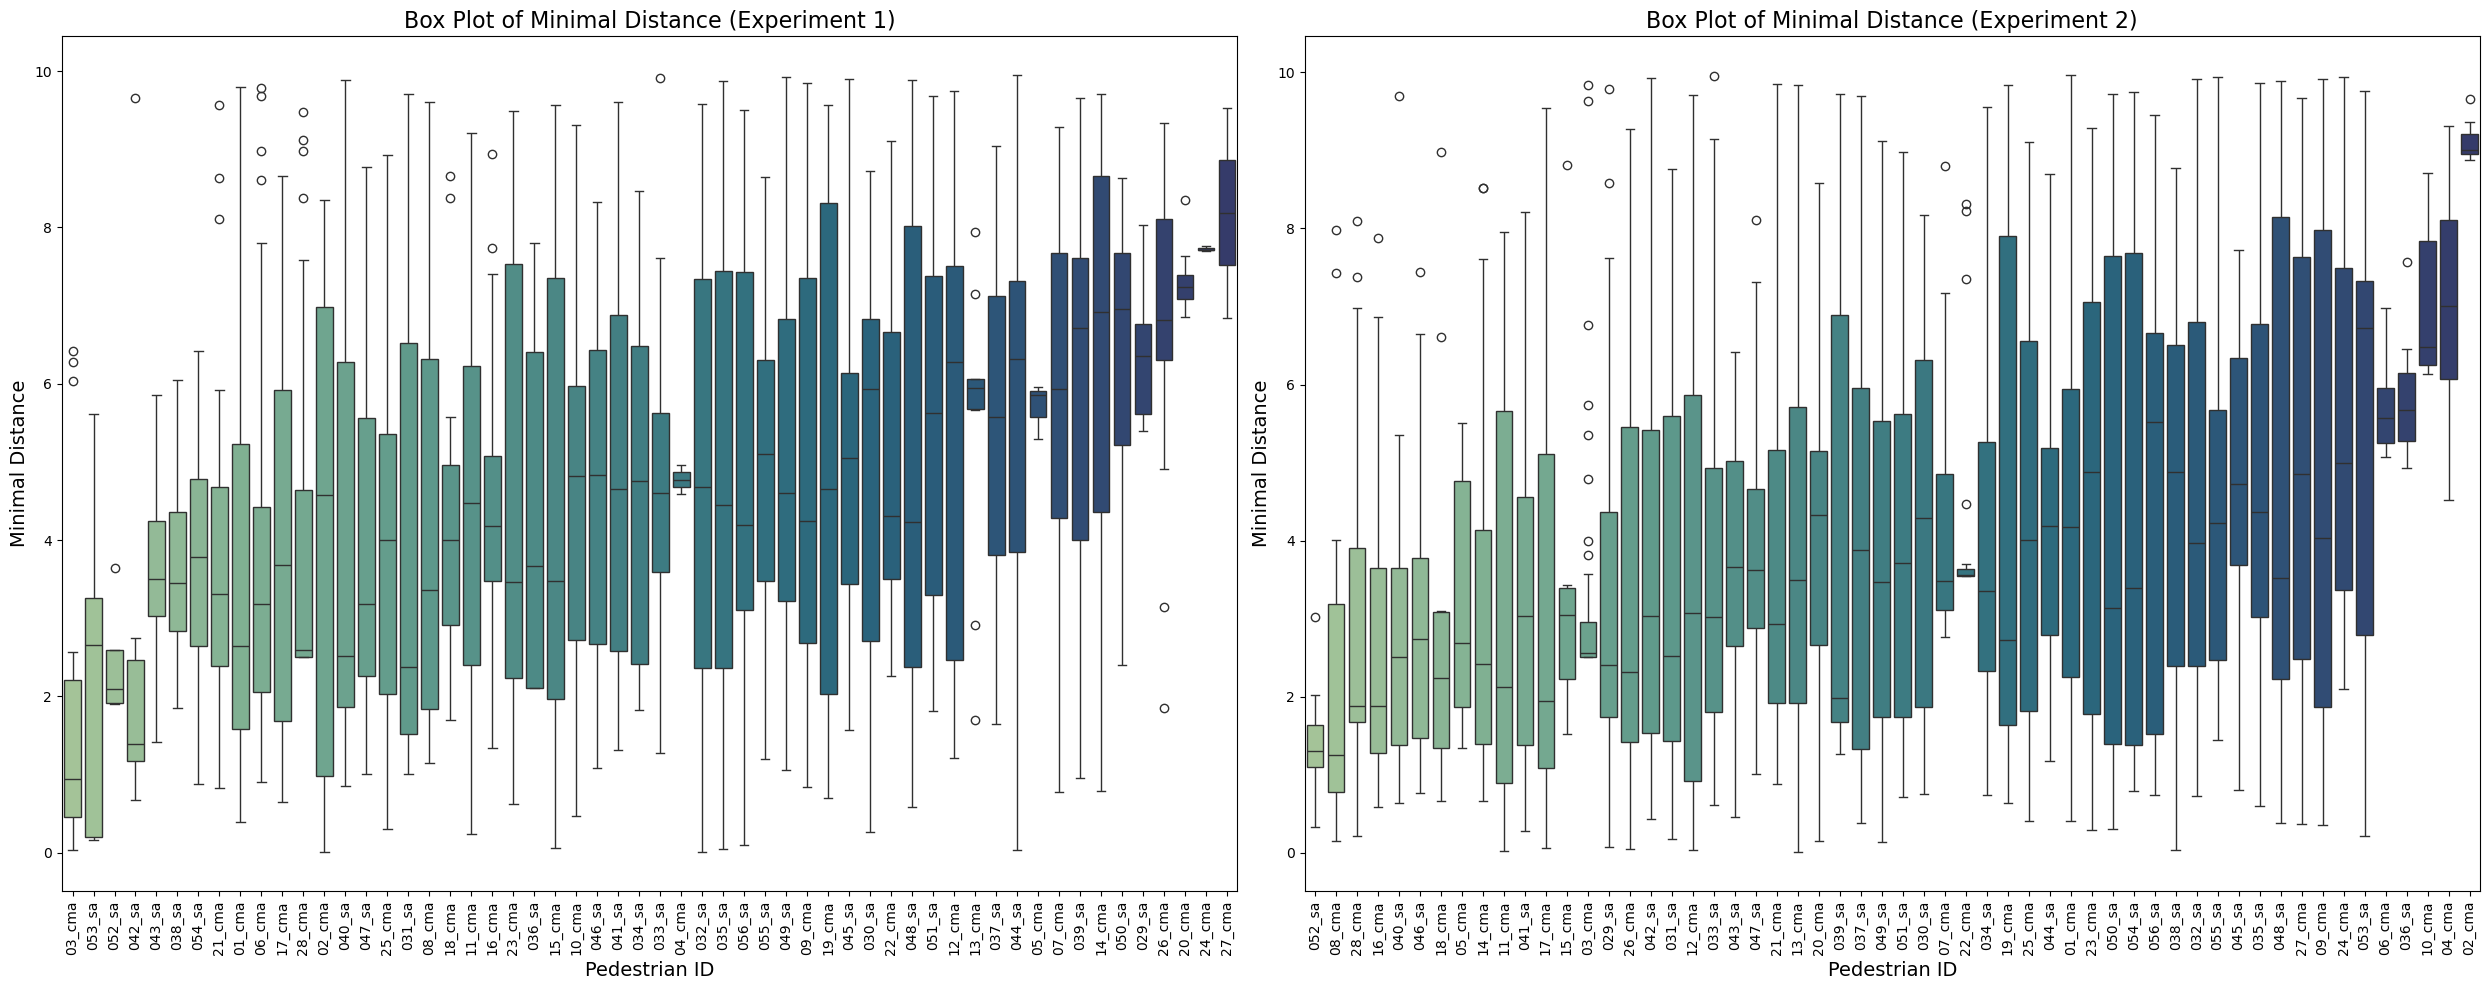

In [27]:
# Calculate the mean minimal distance for each ped_id for both datasets
order_experiment_one = experiment_One.groupby('ped_id')['minimal_distance'].mean().sort_values().index
order_experiment_two = experiment_Two.groupby('ped_id')['minimal_distance'].mean().sort_values().index

# Set up the subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Create the box plot for the Experiment One dataset, ordered by mean minimal distance
sns.boxplot(data=experiment_One, x='ped_id', y='minimal_distance', palette="crest", order=order_experiment_one, ax=axes[0])
axes[0].set_title('Box Plot of Minimal Distance (Experiment 1)', size=16)
axes[0].set_xlabel('Pedestrian ID', size=14)
axes[0].set_ylabel('Minimal Distance', size=14)
axes[0].tick_params(axis='x', rotation=90)

# Create the box plot for the Experiment Two dataset, ordered by mean minimal distance
sns.boxplot(data=experiment_Two, x='ped_id', y='minimal_distance', palette="crest", order=order_experiment_two, ax=axes[1])
axes[1].set_title('Box Plot of Minimal Distance (Experiment 2)', size=16)
axes[1].set_xlabel('Pedestrian ID', size=14)
axes[1].set_ylabel('Minimal Distance', size=14)
axes[1].tick_params(axis='x', rotation=90)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [77]:
filtered_df.head()

,Unnamed: 0.1,Unnamed: 0,ped_id,minimal_distance,num_interactions,SubjectID,Session,Agent_Type,Experiment,PointingTargetBuildingId,AgentID,BuildingName,Context,Label
0,0,0,046_sa,7.496148,1,479,2,Passive,1,35,46,TaskBuilding_35,False,(R) Undertheocean
1,0,0,046_sa,7.496148,1,479,2,Passive,1,35,46,TaskBuilding_35,False,(R) Undertheocean
2,1,1,03_cma,1.606597,1,479,2,Active,1,2,3,TaskBuilding_2,True,(P) Boulangerie
3,1,1,03_cma,1.606597,1,479,2,Active,1,2,3,TaskBuilding_2,True,(P) Boulangerie
4,2,2,22_cma,3.535074,1,479,2,Active,1,29,22,TaskBuilding_29,True,(P) Restaurant


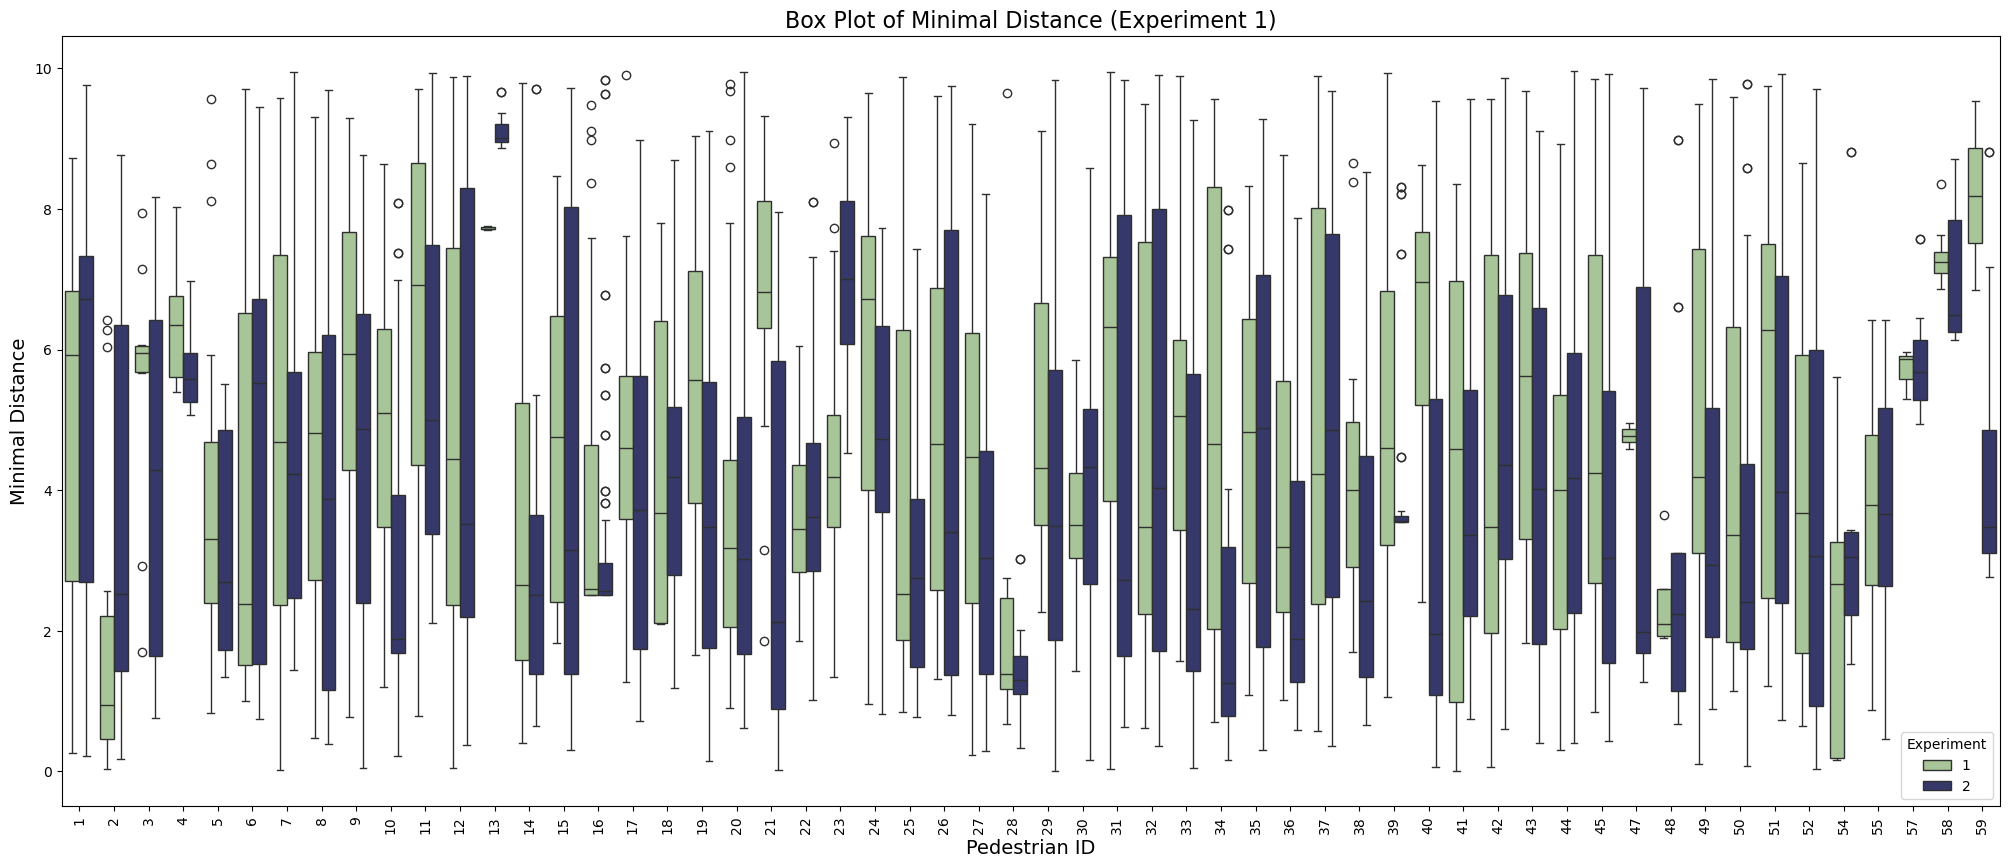

In [28]:
# Set up the subplot for a single plot
fig, ax = plt.subplots(1, 1, figsize=(25, 10))

# Create the box plot for the Experiment One dataset, ordered by mean minimal distance
sns.boxplot(data=stacked_df, x='PointingTargetBuildingId', y='minimal_distance', palette="crest", hue="Experiment", ax=ax)
ax.set_title('Box Plot of Minimal Distance (Experiment 1)', size=16)
ax.set_xlabel('Pedestrian ID', size=14)
ax.set_ylabel('Minimal Distance', size=14)
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()



In [29]:

# Filter the DataFrame to exclude rows where 'Label' is in the labels_to_exclude list
filtered_df = Complete[~Complete["Label"].isin(Labels_Extreme)].reset_index(drop=True)
Number_Of_Lost_Cases  = Complete.shape[0] - filtered_df.shape[0]
Number_Of_Lost_Cases

156

In [30]:
Complete.shape

(8494, 14)

In [31]:
Labels_Extreme

['(R) Shark', '(P) Tapas  bar ']

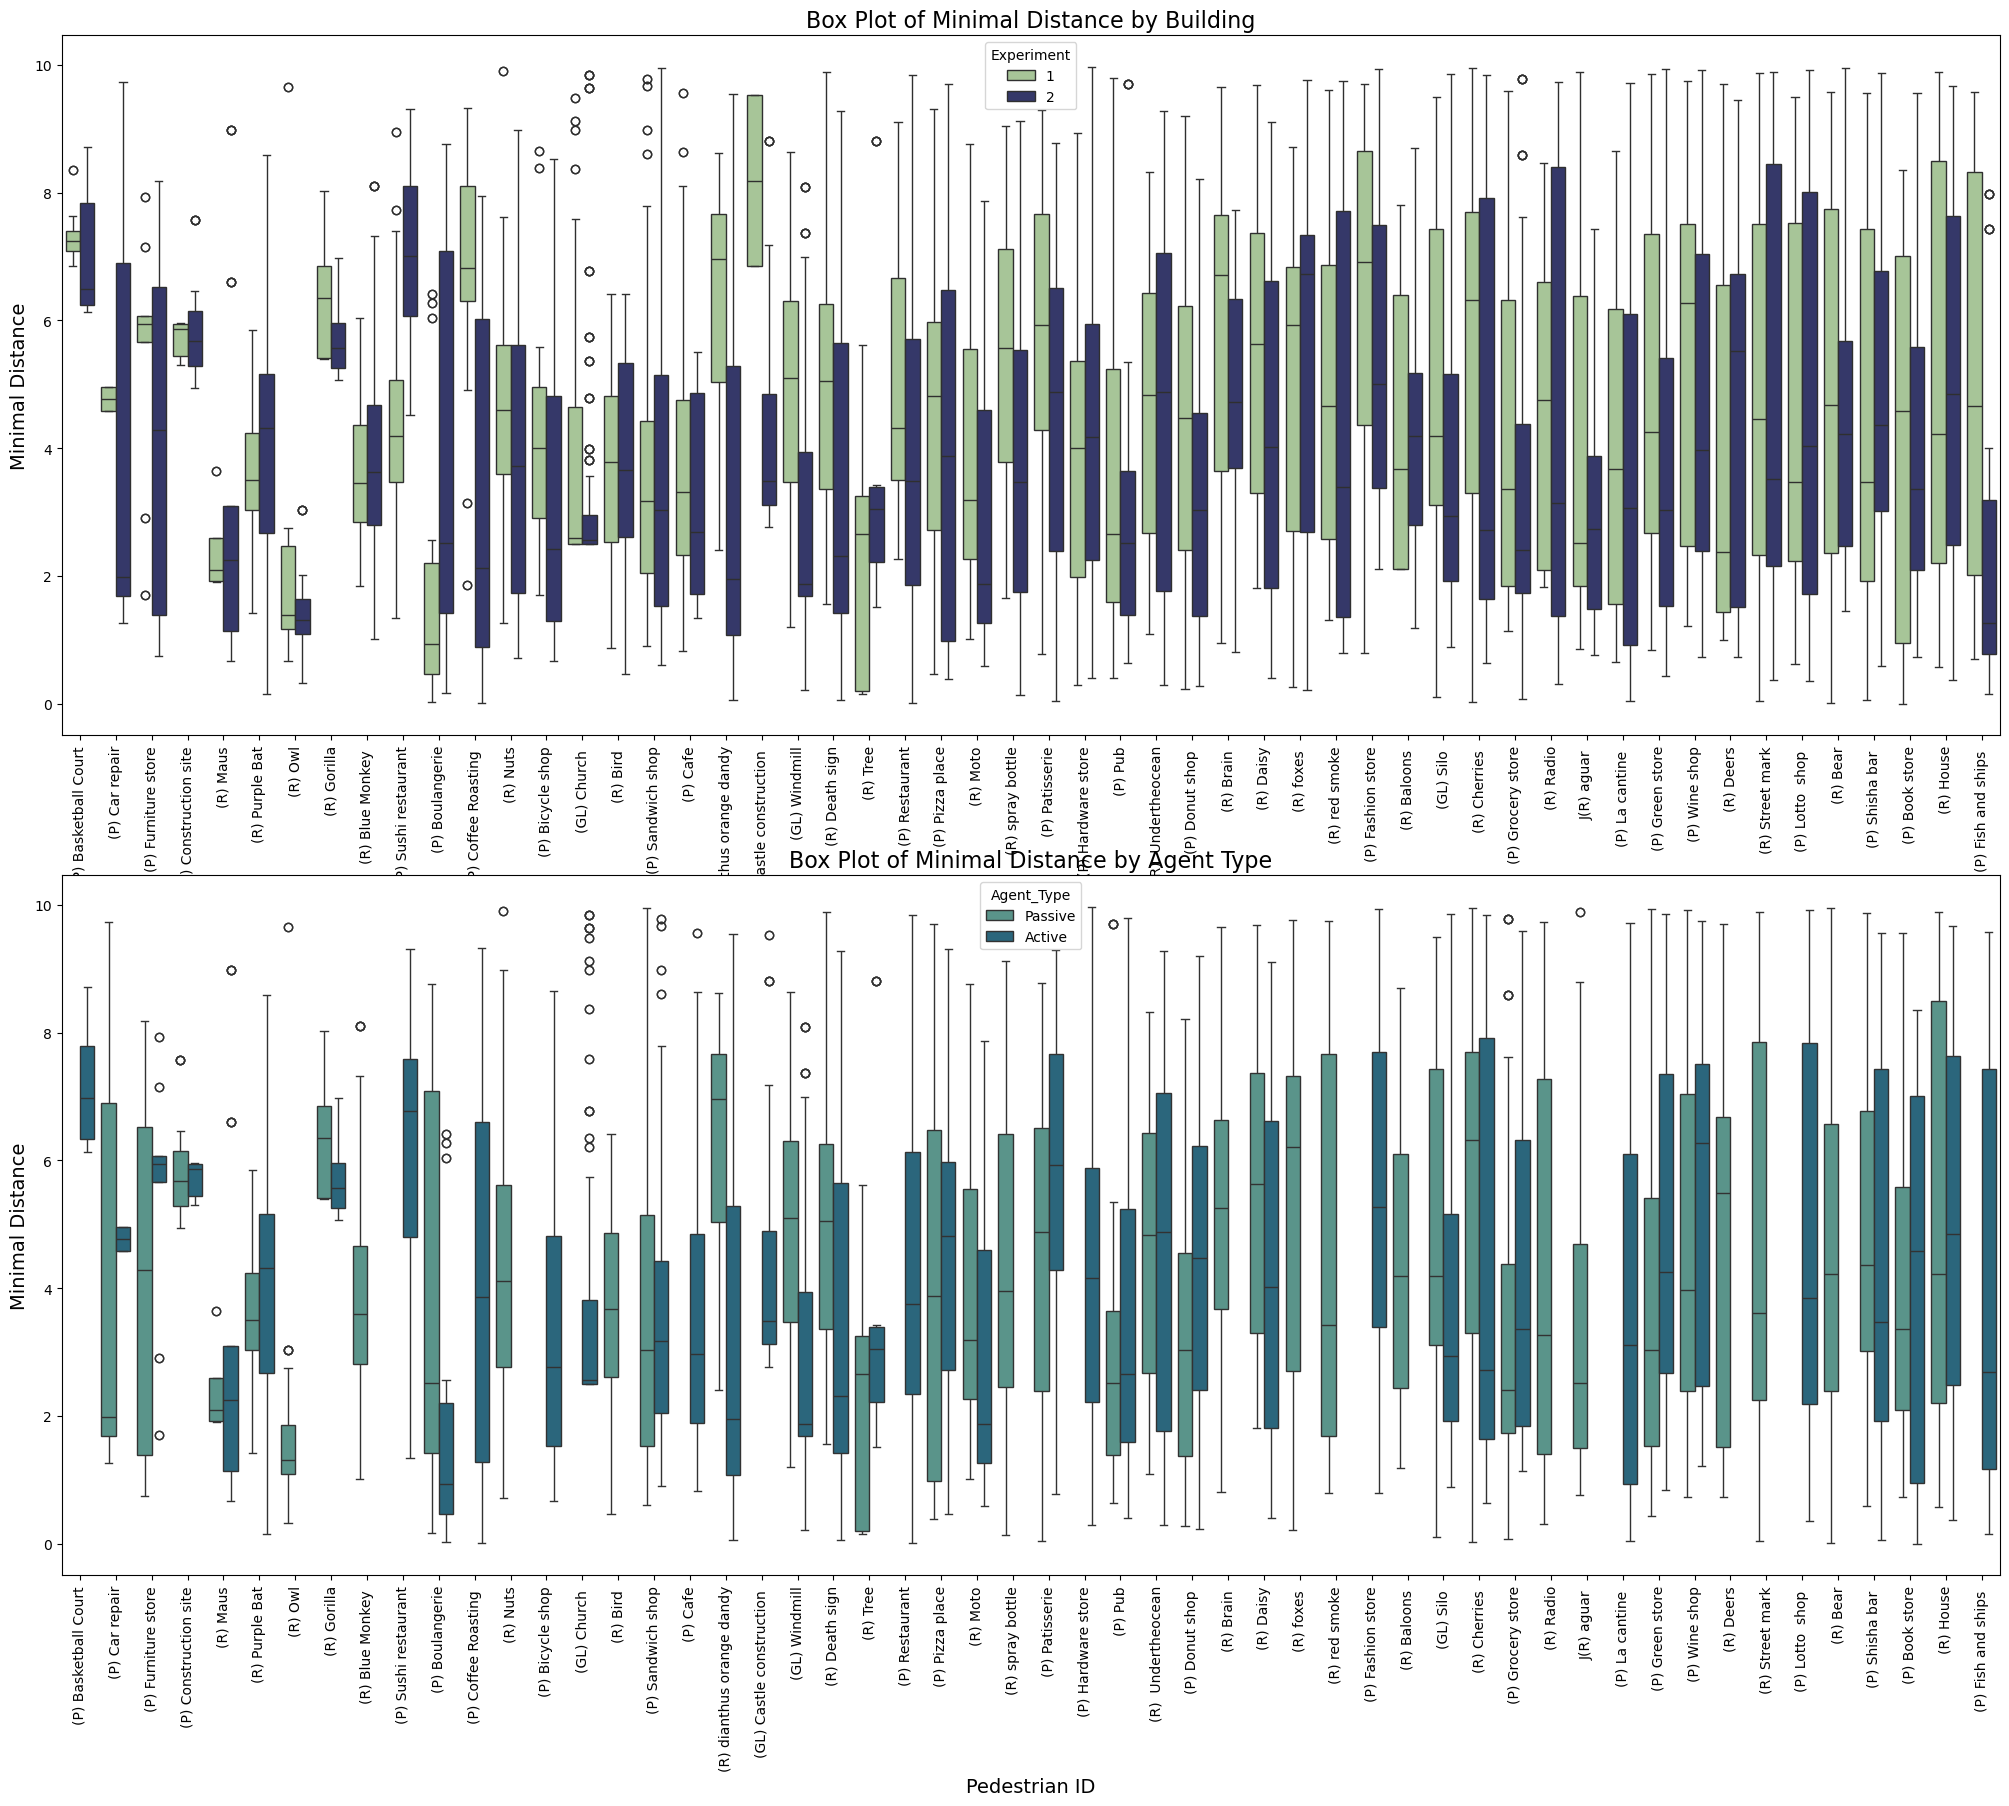

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter data for Experiment 1
experiment_1_data = filtered_df[filtered_df['Experiment'] == 1]

# Step 2: Calculate IQR for each 'Label' in Experiment 1
iqr_values = experiment_1_data.groupby('Label')['minimal_distance'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25)).reset_index()
iqr_values = iqr_values.rename(columns={'minimal_distance': 'IQR'})

# Step 3: Sort 'Label' based on IQR values
sorted_labels = iqr_values.sort_values(by='IQR', ascending=True)['Label']

# Step 4: Use the sorted order for both plots
fig, axes = plt.subplots(2, 1, figsize=(25, 20))

# First plot: Using 'Experiment' as hue
sns.boxplot(data=filtered_df, x='Label', y='minimal_distance', palette="crest", hue="Experiment", ax=axes[0], order=sorted_labels)
axes[0].set_title('Box Plot of Minimal Distance by Building', size=16)
axes[0].set_xlabel('Pedestrian ID', size=14)
axes[0].set_ylabel('Minimal Distance', size=14)
axes[0].tick_params(axis='x', rotation=90)

# Second plot: Using 'Agent_Type' as hue
sns.boxplot(data=filtered_df, x='Label', y='minimal_distance', palette="crest", hue="Agent_Type", ax=axes[1], order=sorted_labels)
axes[1].set_title('Box Plot of Minimal Distance by Agent Type', size=16)
axes[1].set_xlabel('Pedestrian ID', size=14)
axes[1].set_ylabel('Minimal Distance', size=14)
axes[1].tick_params(axis='x', rotation=90)




In [33]:
Complete.head()

,Unnamed: 0.1,Unnamed: 0,ped_id,minimal_distance,num_interactions,SubjectID,Session,Agent_Type,Experiment,PointingTargetBuildingId,AgentID,BuildingName,Context,Label
0,0,0,046_sa,7.496148,1,479,2,Passive,1,35,46,TaskBuilding_35,False,(R) Undertheocean
1,0,0,046_sa,7.496148,1,479,2,Passive,1,35,46,TaskBuilding_35,False,(R) Undertheocean
2,1,1,03_cma,1.606597,1,479,2,Active,1,2,3,TaskBuilding_2,True,(P) Boulangerie
3,1,1,03_cma,1.606597,1,479,2,Active,1,2,3,TaskBuilding_2,True,(P) Boulangerie
4,2,2,22_cma,3.535074,1,479,2,Active,1,29,22,TaskBuilding_29,True,(P) Restaurant


In [83]:
### For PCA 

# Rename AgentID to match summary_combined column
agent_meta = filtered_df.rename(columns={"AgentID": "Agent_ID"})
# Get the index of the row with minimum minimal_distance per agent
idx = agent_meta.groupby(["SubjectID", "Session", "Agent_ID", "Experiment"])["minimal_distance"].idxmin()
# Use those indices to get the desired rows
agent_meta_unique = agent_meta.loc[idx]
#To CSV
agent_meta_unique.to_csv("/Volumes/TwoTeras/3_Merged_Experiments/Proxemics_Session_Min.csv")


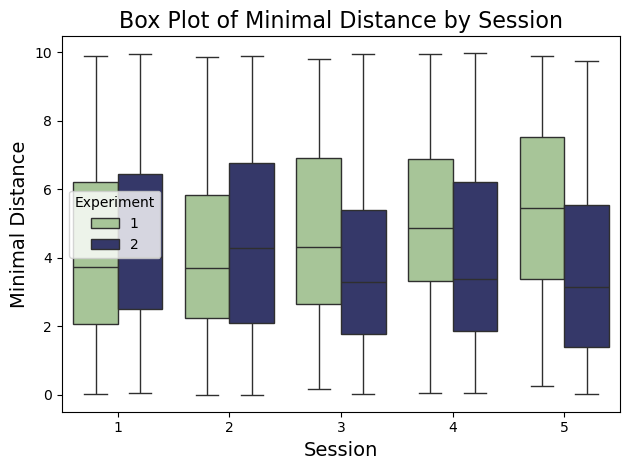

In [34]:
# First plot: Using 'Experiment' as hue
g = sns.boxplot(data=filtered_df, x='Session', y='minimal_distance', palette="crest", hue="Experiment")
g.set_title('Box Plot of Minimal Distance by Session', size=16)
g.set_xlabel('Session', size=14)
g.set_ylabel('Minimal Distance', size=14)

# Show the plots
plt.tight_layout()
plt.show()

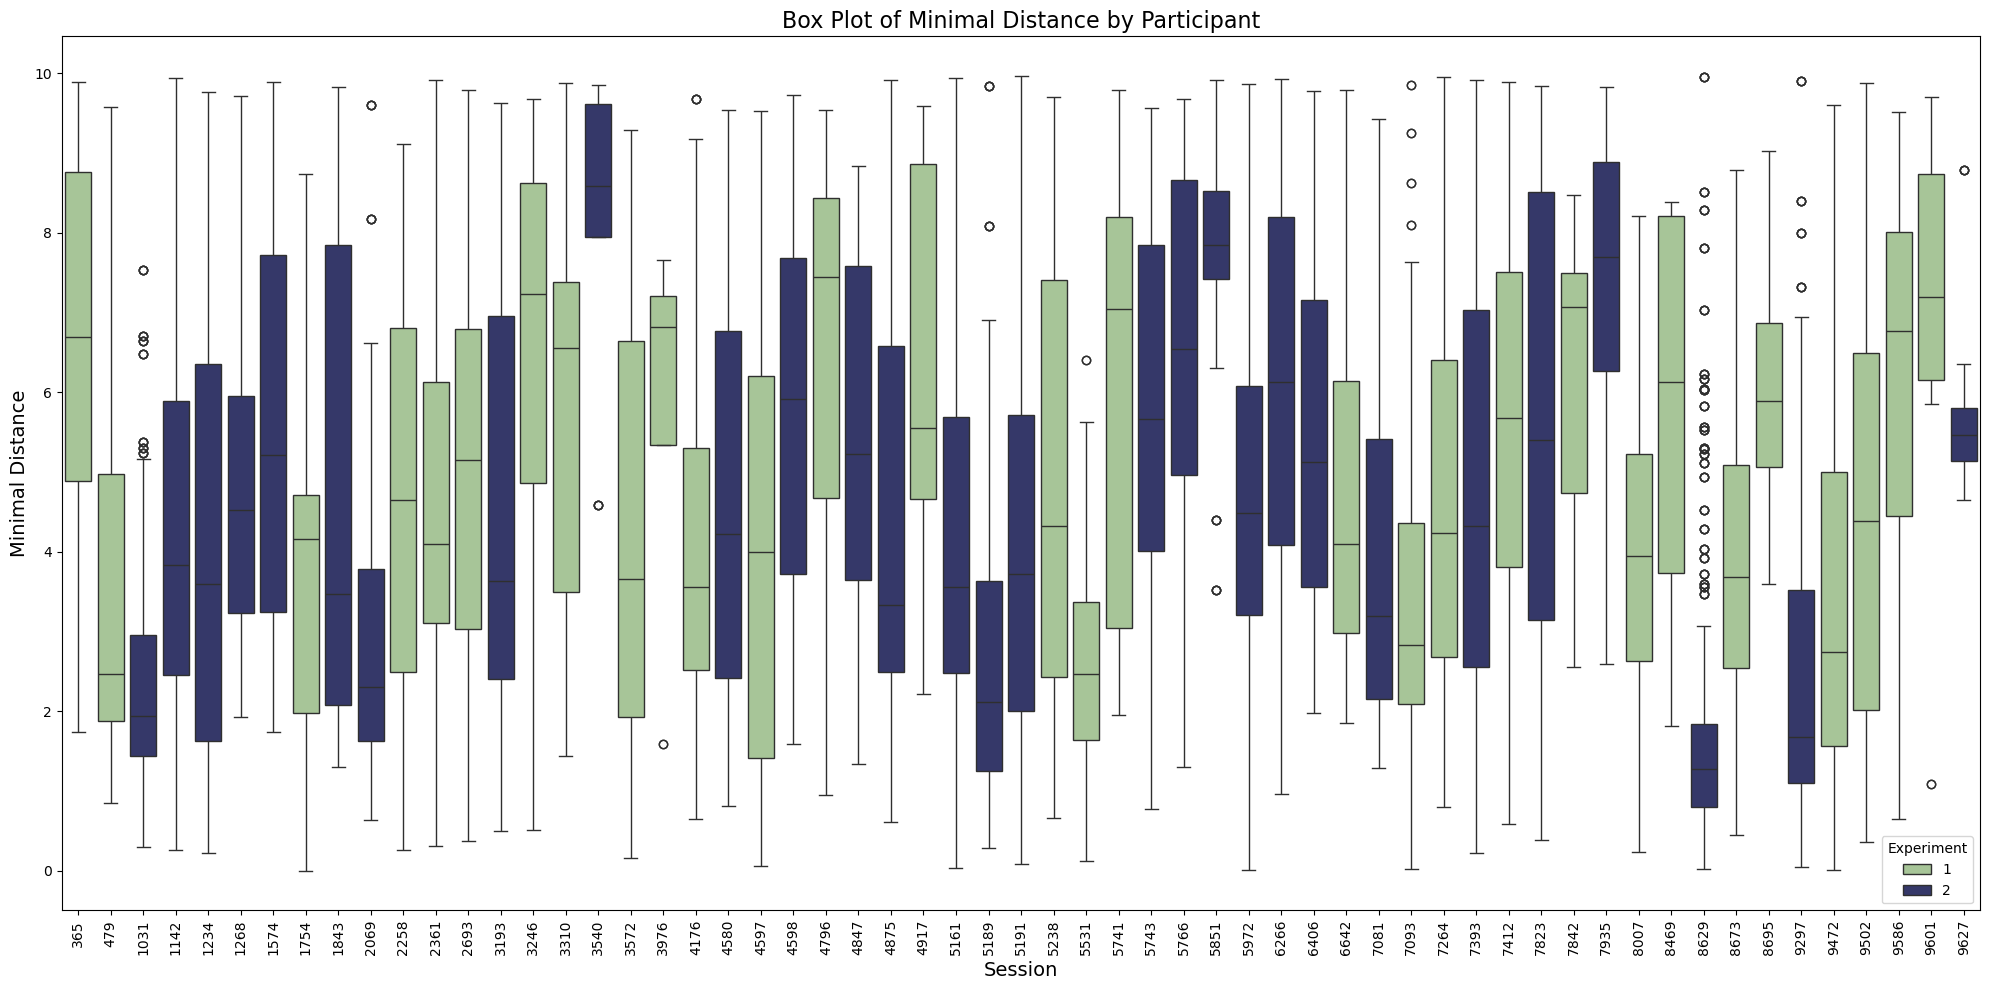

In [35]:
# Set up the subplot for a single plot
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# First plot: Using 'Experiment' as hue
g = sns.boxplot(data=filtered_df, x='SubjectID', y='minimal_distance', palette="crest", hue="Experiment",ax=ax)
g.set_title('Box Plot of Minimal Distance by Participant', size=16)
g.set_xlabel('Session', size=14)
g.set_ylabel('Minimal Distance', size=14)
g.tick_params(axis='x', rotation=90)


# Show the plots
plt.tight_layout()
plt.show()

In [36]:
Complete.head()

,Unnamed: 0.1,Unnamed: 0,ped_id,minimal_distance,num_interactions,SubjectID,Session,Agent_Type,Experiment,PointingTargetBuildingId,AgentID,BuildingName,Context,Label
0,0,0,046_sa,7.496148,1,479,2,Passive,1,35,46,TaskBuilding_35,False,(R) Undertheocean
1,0,0,046_sa,7.496148,1,479,2,Passive,1,35,46,TaskBuilding_35,False,(R) Undertheocean
2,1,1,03_cma,1.606597,1,479,2,Active,1,2,3,TaskBuilding_2,True,(P) Boulangerie
3,1,1,03_cma,1.606597,1,479,2,Active,1,2,3,TaskBuilding_2,True,(P) Boulangerie
4,2,2,22_cma,3.535074,1,479,2,Active,1,29,22,TaskBuilding_29,True,(P) Restaurant


In [37]:
stacked_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4247 entries, 0 to 3195
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0.1              4247 non-null   int64  
 1   Unnamed: 0                4247 non-null   int64  
 2   ped_id                    4247 non-null   object 
 3   minimal_distance          4247 non-null   float64
 4   num_interactions          4247 non-null   int64  
 5   SubjectID                 4247 non-null   int64  
 6   Session                   4247 non-null   int64  
 7   Agent_Type                4247 non-null   object 
 8   Experiment                4247 non-null   int64  
 9   PointingTargetBuildingId  4247 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 365.0+ KB
